# Import Necessary packages

In [72]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Train and Test Data

In [73]:
# Define the paths to the training and testing data files
train_data_dir = pd.read_csv('./MNIST/mnist_train.csv')
test_data_dir =  pd.read_csv('./MNIST/mnist_test.csv')

In [74]:
y_train = train_data_dir['label']
x_train = train_data_dir.drop(['label'], axis=1)

In [75]:
y_test = test_data_dir['label']
x_test = test_data_dir.drop(['label'], axis=1)

In [91]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [76]:
#((x_train, y_train),(x_test, y_test)) = mnist.load_data()

In [77]:

#flattening
#x_train = x_train.reshape((x_train.shape[0],-1))
#x_test = x_test.reshape((x_test.shape[0],-1))

#normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 784)
(10000, 784)
(60000,)


In [79]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [80]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [81]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Defining network architecture using Keras

In [82]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model using SGD with 11 epochs

In [83]:
sgd = SGD(0.01)
epochs = 11
model.compile(loss="categorical_crossentropy",optimizer=sgd, metrics=["accuracy"])
H=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5111 - loss: 1.6830 - val_accuracy: 0.8591 - val_loss: 0.5790
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8605 - loss: 0.5428 - val_accuracy: 0.8959 - val_loss: 0.3941
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8918 - loss: 0.3976 - val_accuracy: 0.9084 - val_loss: 0.3347
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9048 - loss: 0.3491 - val_accuracy: 0.9157 - val_loss: 0.3047
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9134 - loss: 0.3127 - val_accuracy: 0.9215 - val_loss: 0.2829
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9198 - loss: 0.2856 - val_accuracy: 0.9246 - val_loss: 0.2677
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9229 - loss: 0.2745 - val_accuracy: 0.9266 - val_loss: 0.2564
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9260 - loss: 0.2588 - val_accuracy: 0.

# Evaluate Network

In [84]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
      predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.92      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.93      0.94      0.94       982
           5       0.94      0.90      0.92       892
           6       0.93      0.96      0.94       958
           7       0.95      0.92      0.94      1028
           8       0.91      0.92      0.91       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Plot training loss and accuracy

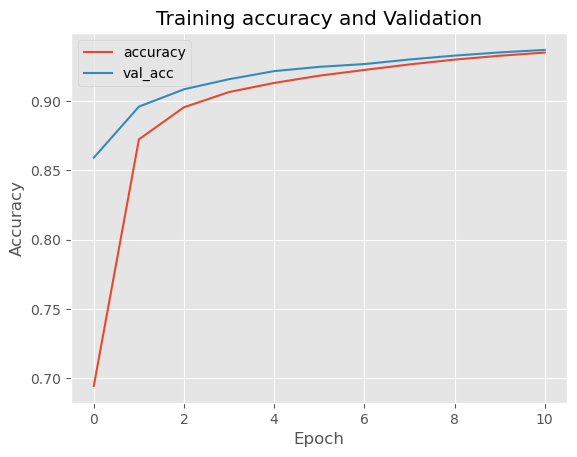

In [89]:
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"], label="val_acc")

plt.title("Training accuracy and Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

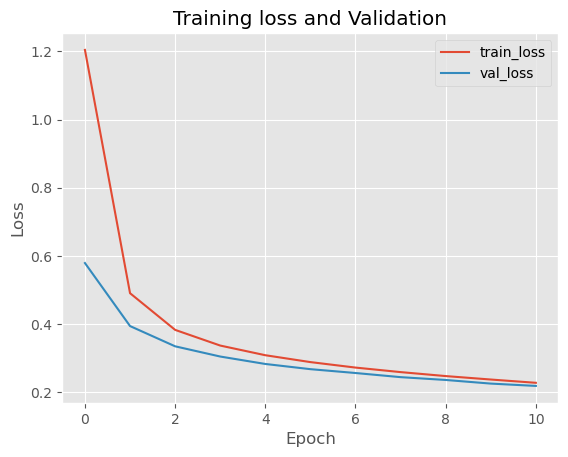

In [90]:
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),H.history["val_loss"], label="val_loss")

plt.title("Training loss and Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()